In [ ]:
from google.colab import files

# Gunakan perintah files.upload untuk mengunggah file
uploaded = files.upload()

Saving semua_transaksi_ch11b.csv to semua_transaksi_ch11b.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
df=pd.read_csv('semua_transaksi_ch11b.csv')
df.head()

,TRX_ID,TRX_TS,PRODUCT_ID,PRODUCT_NAME,SALES
0,85,05/31/17 21.14,263,Cappuccino,34000
1,85,05/31/17 21.14,227,Kopi Tubruk,44000
2,85,05/31/17 21.14,268,Macchiato,26000
3,85,05/31/17 21.14,268,Macchiato,26000
4,85,05/31/17 21.14,268,Macchiato,26000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30503 entries, 0 to 30502
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   TRX_ID        30503 non-null  int64 
 1   TRX_TS        30503 non-null  object
 2   PRODUCT_ID    30503 non-null  int64 
 3   PRODUCT_NAME  30503 non-null  object
 4   SALES         30503 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ MB


In [ ]:
df['TRX_TS'] = pd.to_datetime(df['TRX_TS'], format='%m/%d/%y %H.%M')

# Pisahkan informasi tanggal dan waktu menjadi kolom terpisah
df['Year'] = df['TRX_TS'].dt.year
df['Month'] = df['TRX_TS'].dt.month
df['Day'] = df['TRX_TS'].dt.day
df['Hour'] = df['TRX_TS'].dt.hour
df['Minute'] = df['TRX_TS'].dt.minute
df.head()

,TRX_ID,TRX_TS,PRODUCT_ID,PRODUCT_NAME,SALES,Year,Month,Day,Hour,Minute
0,85,2017-05-31 21:14:00,263,Cappuccino,34000,2017,5,31,21,14
1,85,2017-05-31 21:14:00,227,Kopi Tubruk,44000,2017,5,31,21,14
2,85,2017-05-31 21:14:00,268,Macchiato,26000,2017,5,31,21,14
3,85,2017-05-31 21:14:00,268,Macchiato,26000,2017,5,31,21,14
4,85,2017-05-31 21:14:00,268,Macchiato,26000,2017,5,31,21,14


In [ ]:
df['Year'].value_counts()

2018    15285
2019     8988
2017     6230
Name: Year, dtype: int64

In [ ]:
hasil = df.groupby('Year').sum()

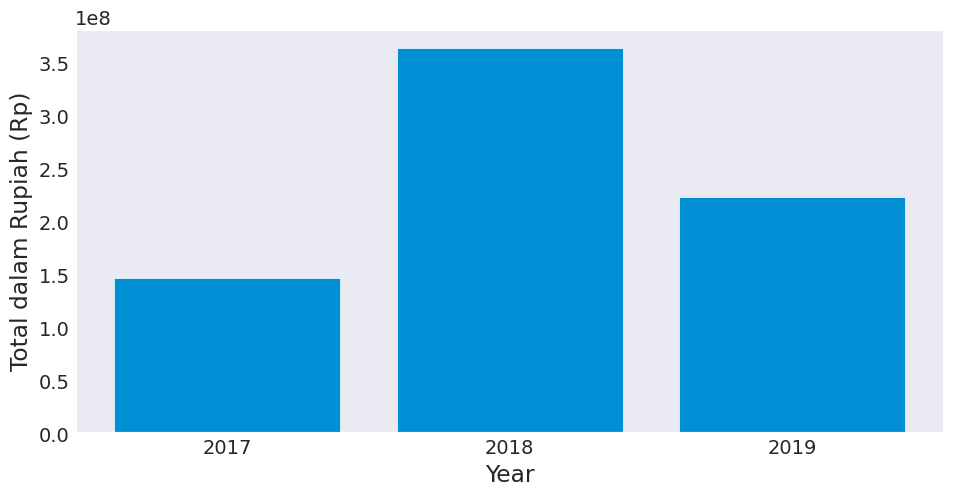

In [ ]:
tahun = [Year for Year, df in df.groupby('Year')]
plt.figure(figsize=(10,5))
plt.bar(tahun, hasil['SALES'])
plt.xticks(tahun)
plt.ylabel('Total dalam Rupiah (Rp)')
plt.xlabel('Year')
plt.grid()
plt.show()

In [ ]:
hasil['SALES']

Year
2017    146402488
2018    364020264
2019    223420450
Name: SALES, dtype: int64

In [ ]:
Waktu = df.groupby('Hour').sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


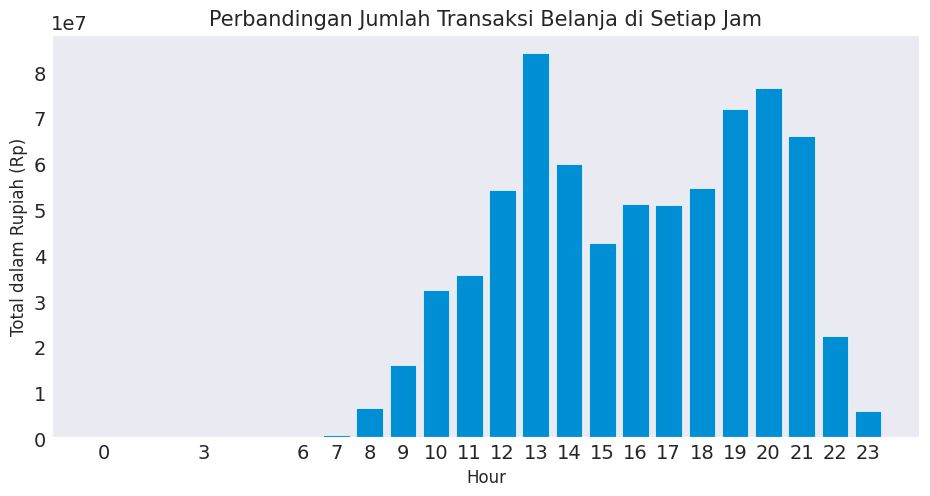

In [ ]:
waktu = [Waktu for Waktu, df in df.groupby('Hour')]
plt.figure(figsize=(10,5))
plt.bar(waktu, Waktu['SALES'])
plt.title('Perbandingan Jumlah Transaksi Belanja di Setiap Jam', fontsize=15)
plt.xticks(waktu)
plt.ylabel('Total dalam Rupiah (Rp)', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.grid()
plt.show()

In [ ]:
promosi=df.groupby(['Hour']).sum().sort_values('Hour',ascending=True)
promosi=promosi[['SALES']].round(2)
promosi

,SALES
Hour,
0,210000
3,45000
6,207000
7,767006
8,6724612
9,16092103
10,32489811
11,35788997
12,54390517


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Diagram Garis untuk menunjukkan Penjualan perhari di Supermarket')

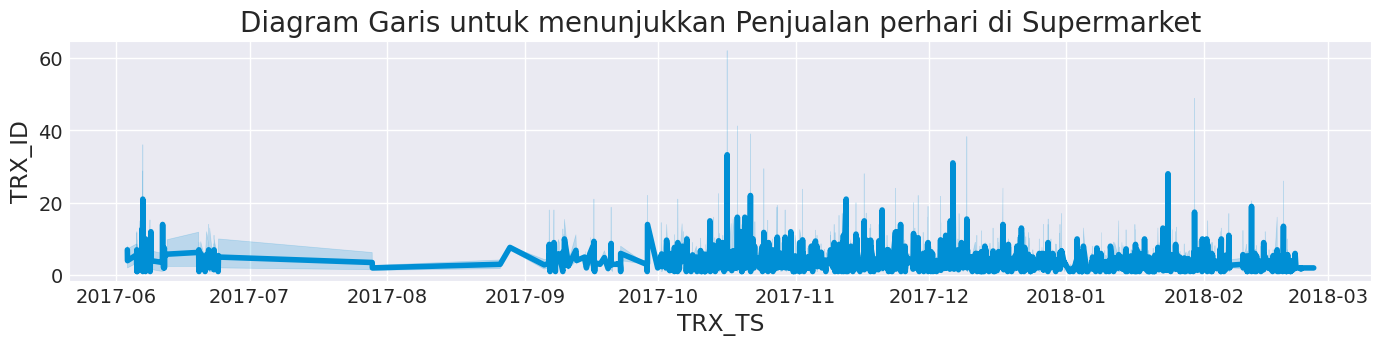

In [ ]:
plt.figure(figsize=(15, 3))
sns.lineplot(data=df, x='TRX_TS', y=df['TRX_ID'].value_counts().sort_values())
plt.title('Diagram Garis untuk menunjukkan Penjualan perhari di Supermarket', fontdict={'fontsize': 20})

In [ ]:
Produk = df.groupby('PRODUCT_NAME').sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


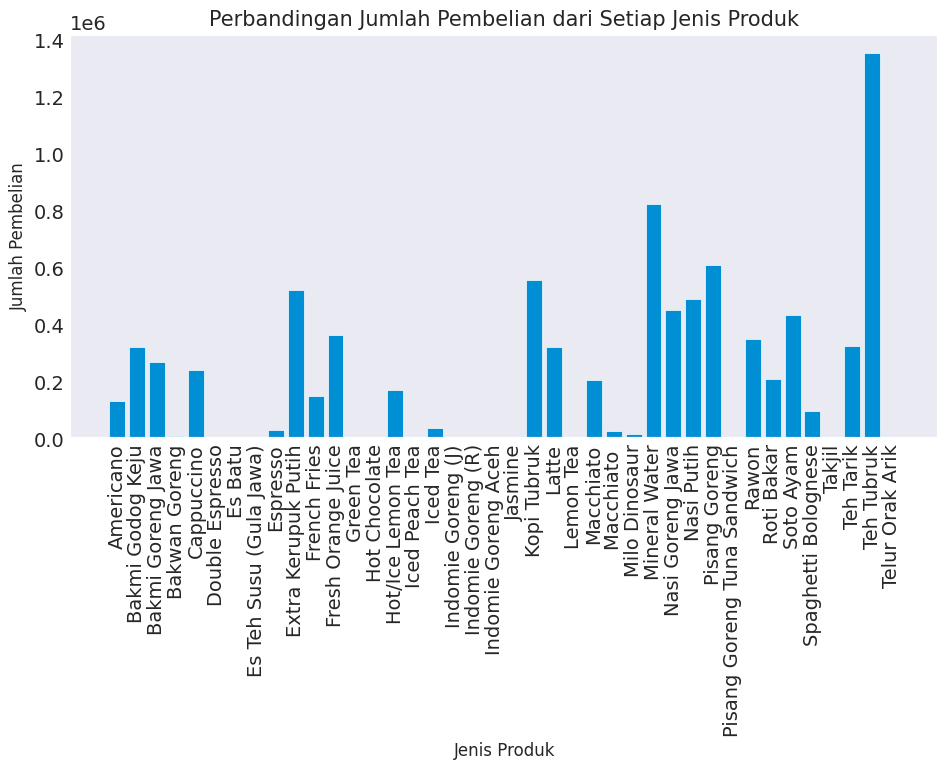

In [ ]:
produk = [PRODUCT_NAME for PRODUCT_NAME, df in df.groupby('PRODUCT_NAME')]
plt.figure(figsize=(10,5))
plt.bar(produk, Produk['PRODUCT_ID'])
plt.xticks(produk,rotation = 'vertical')
plt.title('Perbandingan Jumlah Pembelian dari Setiap Jenis Produk', fontsize=15)
plt.ylabel('Jumlah Pembelian', fontsize=12)
plt.xlabel('Jenis Produk', fontsize=12)
plt.grid()
plt.show()

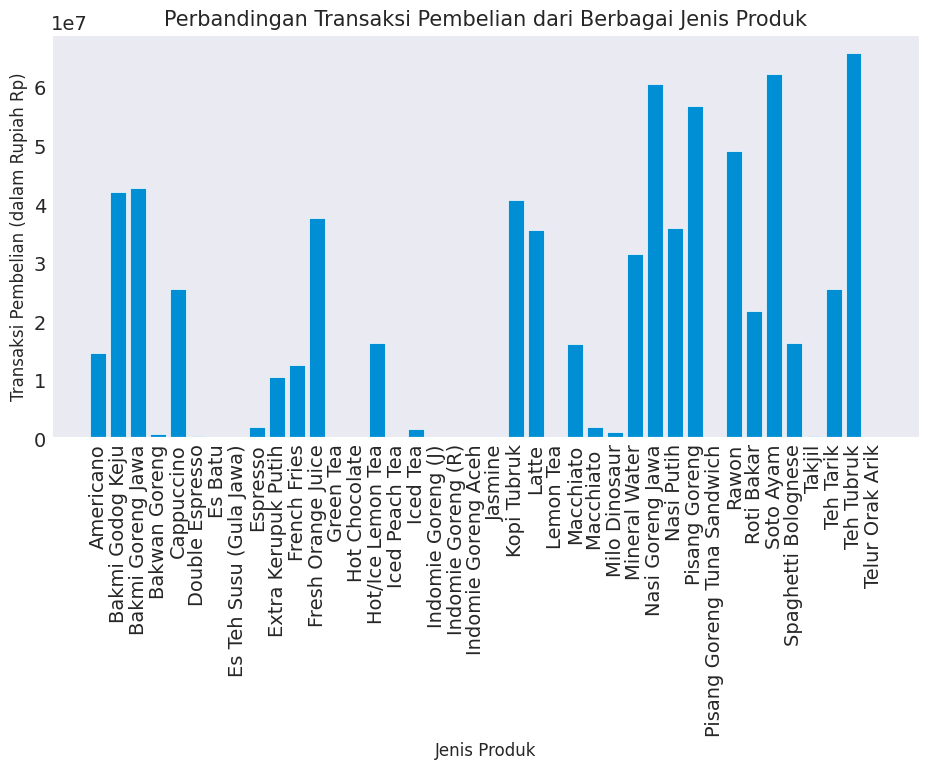

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(produk, Produk['SALES'])
plt.xticks(produk,rotation = 'vertical')
plt.title('Perbandingan Transaksi Pembelian dari Berbagai Jenis Produk', fontsize=15)
plt.ylabel('Transaksi Pembelian (dalam Rupiah Rp)', fontsize=12)
plt.xlabel('Jenis Produk', fontsize=12)
plt.grid()
plt.show()

In [ ]:
jentrans=df.groupby(['PRODUCT_NAME']).sum().sort_values('PRODUCT_NAME',ascending=True)
jentrans=jentrans[['PRODUCT_ID','SALES']].round(2)
jentrans

,PRODUCT_ID,SALES
PRODUCT_NAME,,
Americano,135421,14673000
Bakmi Godog Keju,322565,42296000
Bakmi Goreng Jawa,272522,42826000
Bakwan Goreng,12896,832000
Cappuccino,243353,25699000
Double Espresso,5742,616000
Es Batu,2485,10000
Es Teh Susu (Gula Jawa),1635,120000
Espresso,31868,2030000


[Text(0.5, 1.0, 'Plot Hitung untuk menunjukan jenis pembayaran pada tiap jenis produk')]

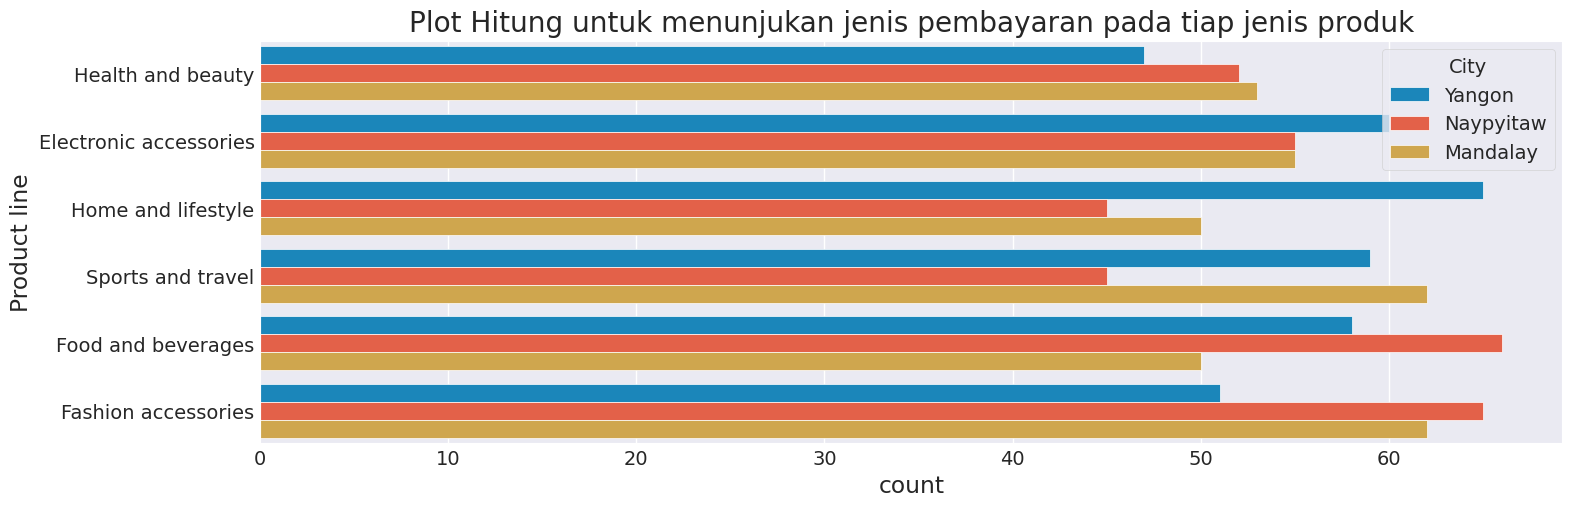

In [ ]:
#plt.figure(figsize= (15,5))
sns.countplot(y='Product line', data= df, hue='City').set(title='Plot Hitung untuk menunjukan jenis pembayaran pada tiap jenis produk')

Text(0.5, 1.0, 'Perbandingan Jumlah Pembeli tiap Cabang')

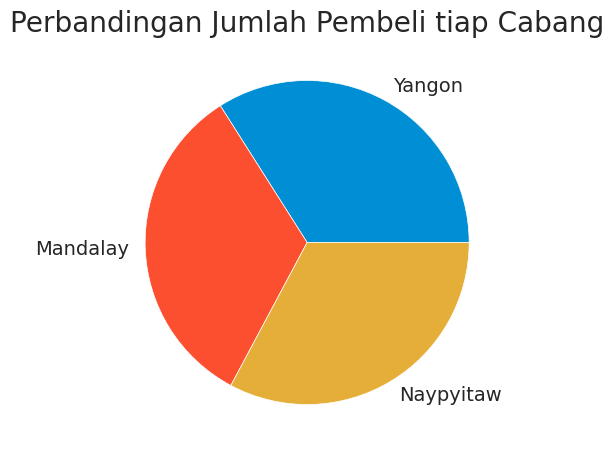

In [ ]:
plt.figure(figsize=(15,5))
df['City'].value_counts().plot.pie()
plt.ylabel('')
plt.title('Perbandingan Jumlah Pembeli tiap Cabang')

In [ ]:
kota=df.groupby(['City']).sum().sort_values('City',ascending=False)
kota=kota[['Quantity','Total', 'gross income']].round(2)
kota

,Quantity,Total,gross income
City,,,
Yangon,1859,106200.37,5057.16
Naypyitaw,1831,110568.71,5265.18
Mandalay,1820,106197.67,5057.03


In [ ]:
Kota = df.groupby('City').sum()

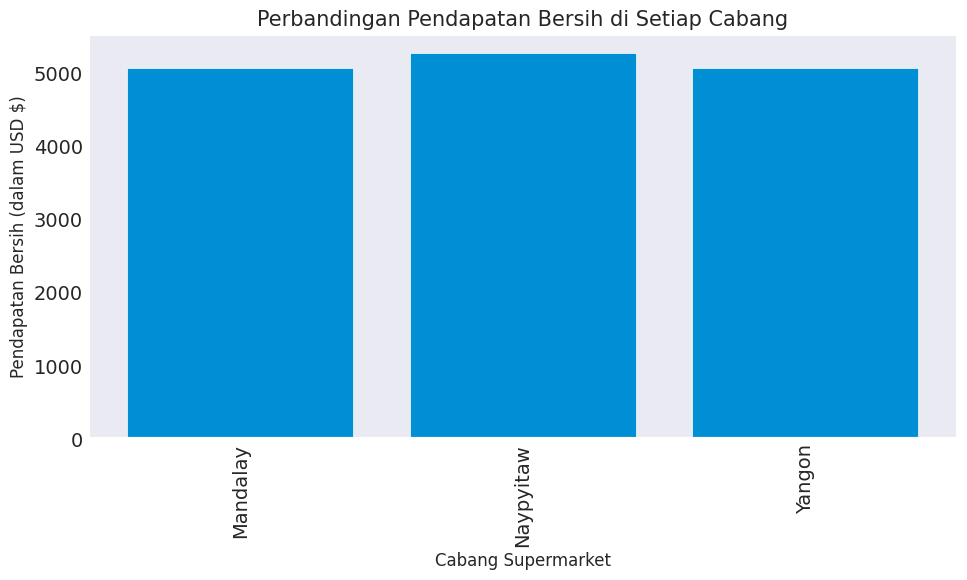

In [ ]:
kota2 = [City for City, df in df.groupby('City')]
plt.figure(figsize=(10,5))
plt.bar(kota2, Kota['gross income'])
plt.xticks(kota2,rotation = 'vertical')
plt.title('Perbandingan Pendapatan Bersih di Setiap Cabang', fontsize=15)
plt.ylabel('Pendapatan Bersih (dalam USD $)', fontsize=12)
plt.xlabel('Cabang Supermarket', fontsize=12)
plt.grid()
plt.show()

In [ ]:
## Generate a comma separated column of products by id
df_agg = df.groupby('TRX_ID')['PRODUCT_NAME'].agg(lambda x: ','.join(x)).reset_index().drop('TRX_ID',axis=1)

In [ ]:
# Generated a list of transactions and products
transactions = df_agg['PRODUCT_NAME'].apply(lambda t: t.split(',')).tolist()
transactions

[['Cappuccino',
  'Kopi Tubruk',
  'Macchiato',
  'Macchiato',
  'Macchiato',
  'Nasi Putih',
  'Rawon',
  'Soto Ayam'],
 ['Fresh Orange Juice',
  'Mineral Water',
  'Nasi Putih',
  'Nasi Putih',
  'Soto Ayam',
  'Soto Ayam'],
 ['Kopi Tubruk', 'Nasi Putih', 'Soto Ayam'],
 ['Cappuccino', 'Roti Bakar'],
 ['Extra Kerupuk Putih',
  'Kopi Tubruk',
  'Mineral Water',
  'Mineral Water',
  'Nasi Goreng Jawa',
  'Nasi Putih',
  'Nasi Putih',
  'Soto Ayam',
  'Mineral Water'],
 ['Cappuccino', 'Latte'],
 ['Macchiato'],
 ['Latte'],
 ['Bakmi Godog Keju', 'Latte', 'Macchiato', 'Macchiato', 'Teh Tubruk'],
 ['Bakmi Goreng Jawa',
  'Macchiato',
  'Mineral Water',
  'Rawon',
  'Teh Tarik',
  'Teh Tarik'],
 ['Macchiato', 'Nasi Putih', 'Nasi Putih', 'Rawon', 'Soto Ayam'],
 ['Roti Bakar', 'Spaghetti Bolognese', 'Teh Tarik', 'Fresh Orange Juice'],
 ['Fresh Orange Juice',
  'Mineral Water',
  'Mineral Water',
  'Mineral Water',
  'Nasi Putih',
  'Nasi Putih',
  'Nasi Putih',
  'Rawon',
  'Soto Ayam'],
 ['Lat

In [ ]:
# using mlxtend package
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Instantiate transaction encoder and identify unique items in transactions
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot

,Americano,Bakmi Godog Keju,Bakmi Goreng Jawa,Bakwan Goreng,Cappuccino,Double Espresso,Es Batu,Es Teh Susu (Gula Jawa),Espresso,Extra Kerupuk Putih,...,Pisang Goreng,Pisang Goreng Tuna Sandwich,Rawon,Roti Bakar,Soto Ayam,Spaghetti Bolognese,Takjil,Teh Tarik,Teh Tubruk,Telur Orak Arik
0,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8139,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
8140,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
8141,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
8142,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
support = onehot.mean()
print(support.sort_values(ascending=False))

Teh Tubruk                     0.342829
Mineral Water                  0.224705
Pisang Goreng                  0.206655
Nasi Putih                     0.196832
Kopi Tubruk                    0.177554
Soto Ayam                      0.173502
Nasi Goreng Jawa               0.170309
Rawon                          0.154101
Bakmi Godog Keju               0.131508
Extra Kerupuk Putih            0.129912
Fresh Orange Juice             0.111616
Bakmi Goreng Jawa              0.111370
Latte                          0.109283
Teh Tarik                      0.099214
Roti Bakar                     0.093566
Cappuccino                     0.088163
Macchiato                      0.064465
Hot/Ice Lemon Tea              0.059430
Americano                      0.055010
French Fries                   0.052186
Spaghetti Bolognese            0.032785
Espresso                       0.012647
Macchiato                      0.010560
Iced Tea                       0.007736
Milo Dinosaur                  0.004789


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets = apriori(onehot, min_support = 0.1, max_len = 3, use_colnames = True)
print(f'len of frequent itemsets: {len(frequent_itemsets)}')
print(frequent_itemsets)

len of frequent itemsets: 16
     support                           itemsets
0   0.131508                 (Bakmi Godog Keju)
1   0.111370                (Bakmi Goreng Jawa)
2   0.129912              (Extra Kerupuk Putih)
3   0.111616               (Fresh Orange Juice)
4   0.177554                      (Kopi Tubruk)
5   0.109283                            (Latte)
6   0.224705                    (Mineral Water)
7   0.170309                 (Nasi Goreng Jawa)
8   0.196832                       (Nasi Putih)
9   0.206655                    (Pisang Goreng)
10  0.154101                            (Rawon)
11  0.173502                        (Soto Ayam)
12  0.342829                       (Teh Tubruk)
13  0.104003  (Nasi Goreng Jawa, Mineral Water)
14  0.101793        (Mineral Water, Teh Tubruk)
15  0.122667        (Teh Tubruk, Pisang Goreng)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
print(f'The number of rules is {len(rules)}')
print('\n')
print('TABLE OF METRICS FOR RULES')
rules.sort_values('lift',ascending=False)

The number of rules is 6


TABLE OF METRICS FOR RULES


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Nasi Goreng Jawa),(Mineral Water),0.170309,0.224705,0.104003,0.610671,2.717651,0.065734,1.991359,0.761772
1,(Mineral Water),(Nasi Goreng Jawa),0.224705,0.170309,0.104003,0.462842,2.717651,0.065734,1.544592,0.815219
4,(Teh Tubruk),(Pisang Goreng),0.342829,0.206655,0.122667,0.357808,1.731425,0.051820,1.235370,0.642818
5,(Pisang Goreng),(Teh Tubruk),0.206655,0.342829,0.122667,0.593583,1.731425,0.051820,1.616986,0.532481
3,(Teh Tubruk),(Mineral Water),0.342829,0.224705,0.101793,0.296920,1.321374,0.024757,1.102712,0.370089
2,(Mineral Water),(Teh Tubruk),0.224705,0.342829,0.101793,0.453005,1.321374,0.024757,1.201421,0.313703


In [ ]:
df['TRX_ID'].value_counts().sort_values(ascending=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5945     1
8337     1
2586     1
2584     1
3762     1
        ..
2242    58
411     63
2356    66
2241    66
7518    80
Name: TRX_ID, Length: 8144, dtype: int64